In [6]:
import scipy 


In [7]:
# There are some class instances that make special use of the slicing functionality to provide efficient means for array construction. This part will discuss the
# operation of np.mgrid , np.ogrid , np.r_ , and np.c_ for quickly constructing arrays.

In [8]:
#For example, rather than writing something like the following


a = np.concatenate(([3], [0]*5, np.arange(-1, 1.002, 2/9.0)))

In [9]:
a

array([ 3.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        , -1.        , -0.77777778, -0.55555556, -0.33333333,
       -0.11111111,  0.11111111,  0.33333333,  0.55555556,  0.77777778,
        1.        ])

In [10]:
a = np.r_[3,[0]*5,-1:1:10j]

In [11]:
a

array([ 3.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        , -1.        , -0.77777778, -0.55555556, -0.33333333,
       -0.11111111,  0.11111111,  0.33333333,  0.55555556,  0.77777778,
        1.        ])

In [12]:
np.mgrid[0:5,0:5]

array([[[0, 0, 0, 0, 0],
        [1, 1, 1, 1, 1],
        [2, 2, 2, 2, 2],
        [3, 3, 3, 3, 3],
        [4, 4, 4, 4, 4]],

       [[0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4]]])

In [14]:
#support complex

In [15]:
np.mgrid[0:5:4j,0:5:4j]

array([[[0.        , 0.        , 0.        , 0.        ],
        [1.66666667, 1.66666667, 1.66666667, 1.66666667],
        [3.33333333, 3.33333333, 3.33333333, 3.33333333],
        [5.        , 5.        , 5.        , 5.        ]],

       [[0.        , 1.66666667, 3.33333333, 5.        ],
        [0.        , 1.66666667, 3.33333333, 5.        ],
        [0.        , 1.66666667, 3.33333333, 5.        ],
        [0.        , 1.66666667, 3.33333333, 5.        ]]])

In [16]:
# Having meshed arrays like this is sometimes very useful. However, it is not always needed just to evaluate some N-dimensional function over a grid due to the array-broadcasting rules of Numpy and SciPy. If this is the only purpose for generating a meshgrid, you should instead use the function ogrid which generates an “open” grid using newaxis judiciously to create N, N-d arrays where only one dimension in each array has length greater than 1. This will save memory and create the same result if the only purpose for the meshgrid is to generate sample points for evaluation of an N-d function.a

In [17]:
from numpy import poly1d
>>> p = poly1d([3,4,5])
>>> print(p)


   2
3 x + 4 x + 5


In [18]:
print(p*p)

   4      3      2
9 x + 24 x + 46 x + 40 x + 25


In [20]:
print(p.integ(k=10))

   3     2
1 x + 2 x + 5 x + 10


In [21]:
print(p.deriv())

 
6 x + 4


In [22]:
p([4, 5])

array([ 69, 100])

In [23]:
p([4])

array([69])

In [24]:
 from scipy import special
>>> def drumhead_height(n, k, distance, angle, t):
...    kth_zero = special.jn_zeros(n, k)[-1]
...    return np.cos(t) * np.cos(n*angle) * special.jn(n, distance*kth_zero)
>>> theta = np.r_[0:2*np.pi:50j]
>>> radius = np.r_[0:1:50j]
>>> x = np.array([r * np.cos(theta) for r in radius])
>>> y = np.array([r * np.sin(theta) for r in radius])
>>> z = np.array([drumhead_height(1, 1, r, theta, 0.5) for r in radius])


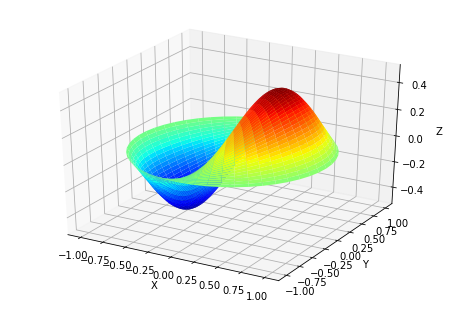

In [28]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(x, y, z, rstride=1, cstride=1, cmap=cm.jet)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

In [ ]:
# The simplex algorithm is probably the simplest way to minimize a fairly well-behaved function. It requires only function evaluations and is a good choice for simple minimization problems. However, because it does not use any gradient evaluations, it may take longer to find the minimum.

# Another optimization algorithm that needs only function calls to find the minimum is Powell’s method available by setting method='powell' in minimize.



In [3]:
import numpy as np
>>> from scipy.optimize import minimize
>>>
>>> def rosen(x):
...     """The Rosenbrock function"""
...     return sum(100.0*(x[1:]-x[:-1]**2.0)**2.0 + (1-x[:-1])**2.0)

In [4]:
x0 = np.array([1.3, 0.7, 0.8, 1.9, 1.2])

In [5]:
res = minimize(rosen, x0, method='nelder-mead',
...                options={'xtol': 1e-8, 'disp': True})

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 339
         Function evaluations: 571


In [6]:
res


 final_simplex: (array([[1.        , 1.        , 1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        , 1.00000001, 1.00000001],
       [1.        , 1.        , 1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        , 1.        , 0.99999999]]), array([4.86115343e-17, 7.65182843e-17, 8.11395684e-17, 8.63263255e-17,
       8.64080682e-17, 2.17927418e-16]))
           fun: 4.861153433422115e-17
       message: 'Optimization terminated successfully.'
          nfev: 571
           nit: 339
        status: 0
       success: True
             x: array([1., 1., 1., 1., 1.])